In [23]:
import numpy as np
import pandas as pd
#import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
NFLX = DataReader('NFLX',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


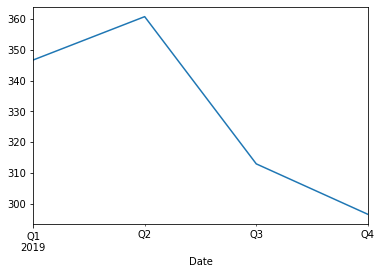

In [27]:
%matplotlib inline
NFLX.Close.resample('Q').mean().plot() 

In [22]:
NFLX.describe(include="all")

,Date,High,Low,Open,Close,Volume,Adj Close,Month,WeekDay
count,252,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000
unique,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,332.998691,324.097976,328.637064,328.872380,7.857804e+06,328.872380,6.539683,2.015873
std,NaN,34.693938,34.589141,34.821612,34.489629,4.656639e+06,34.489629,3.436738,1.408478
min,NaN,265.000000,252.279999,255.710007,254.589996,2.019300e+06,254.589996,1.000000,0.000000
25%,NaN,299.804993,292.379997,295.917503,296.892494,5.106350e+06,296.892494,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292C8C5DBA8>,
      dtype=object)

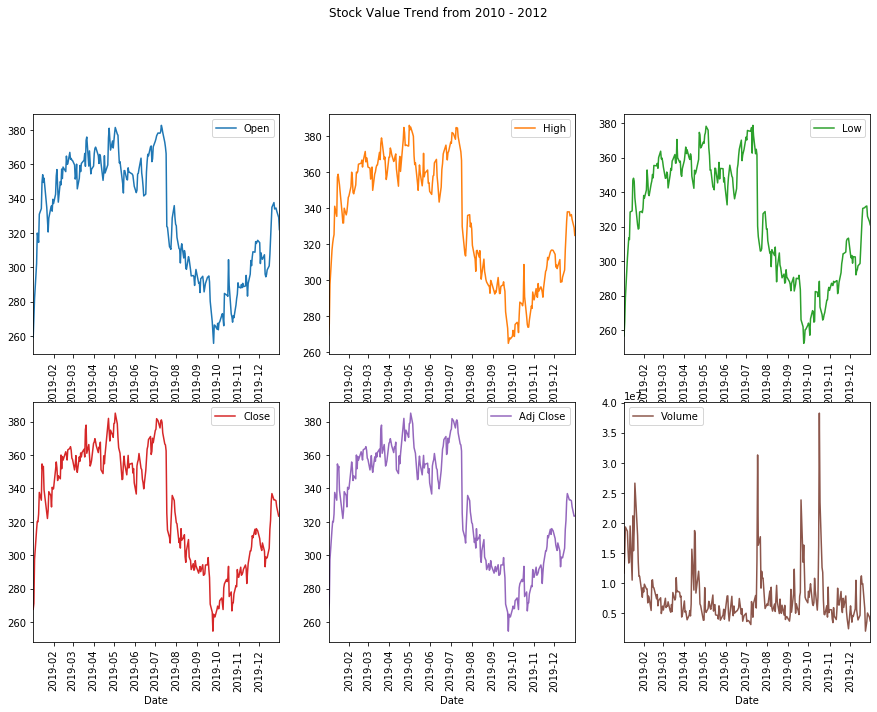

In [8]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
NFLX.plot(y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "Stock Value Trend from 2010 - 2012", rot = 90)

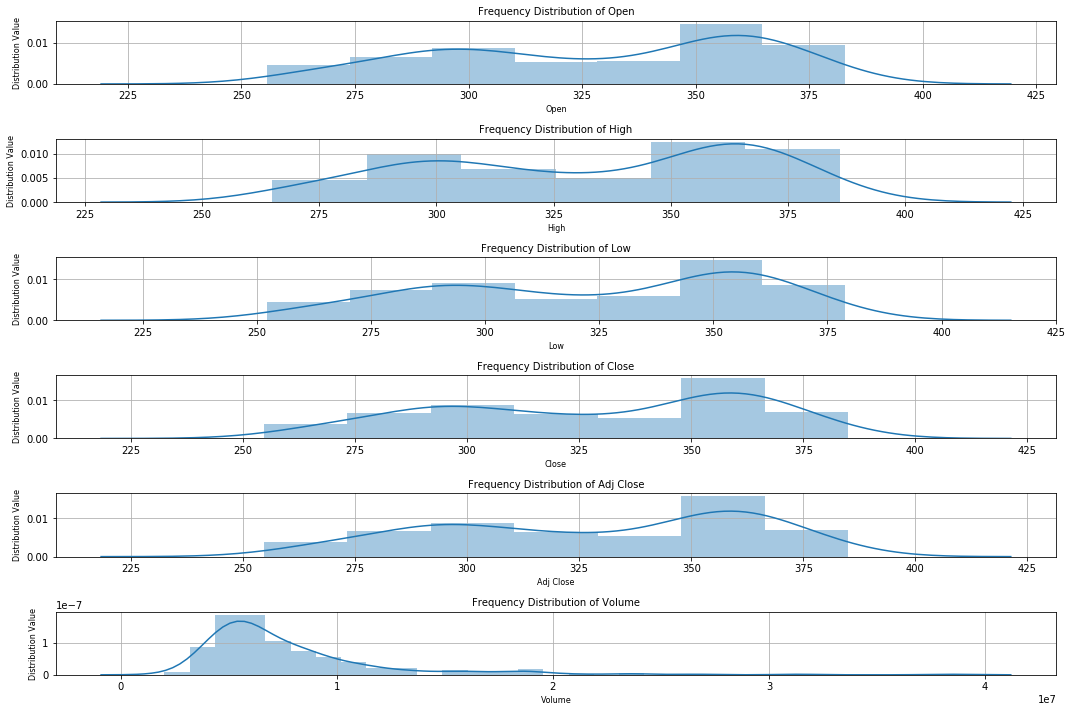

In [9]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(NFLX[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

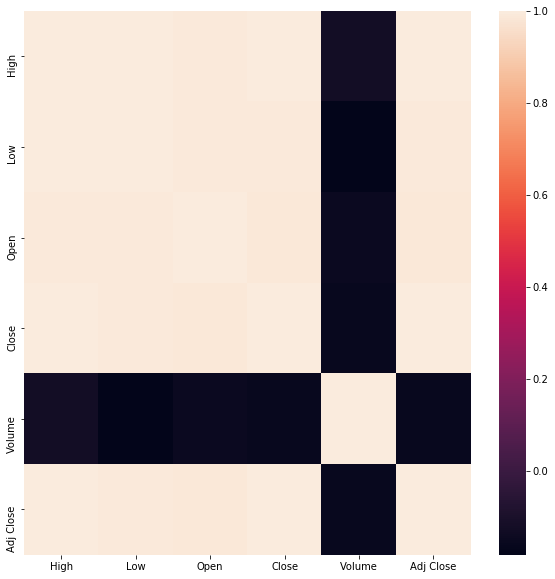

In [10]:
# Check for factors responsible in overall volume trade
fig, ax = plt.subplots (figsize = (10, 10))
corr_matrix = NFLX.corr() # Perform default correlation using Pearson Method 

# Plot the correlation matrix in a heatmap to understand better
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)

In [11]:
corr_matrix

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.995494,0.995132,0.995473,-0.123666,0.995473
Low,0.995494,1.000000,0.994429,0.994901,-0.182431,0.994901
Open,0.995132,0.994429,1.000000,0.987842,-0.148297,0.987842
Close,0.995473,0.994901,0.987842,1.000000,-0.156329,1.000000
Volume,-0.123666,-0.182431,-0.148297,-0.156329,1.000000,-0.156329
Adj Close,0.995473,0.994901,0.987842,1.000000,-0.156329,1.000000


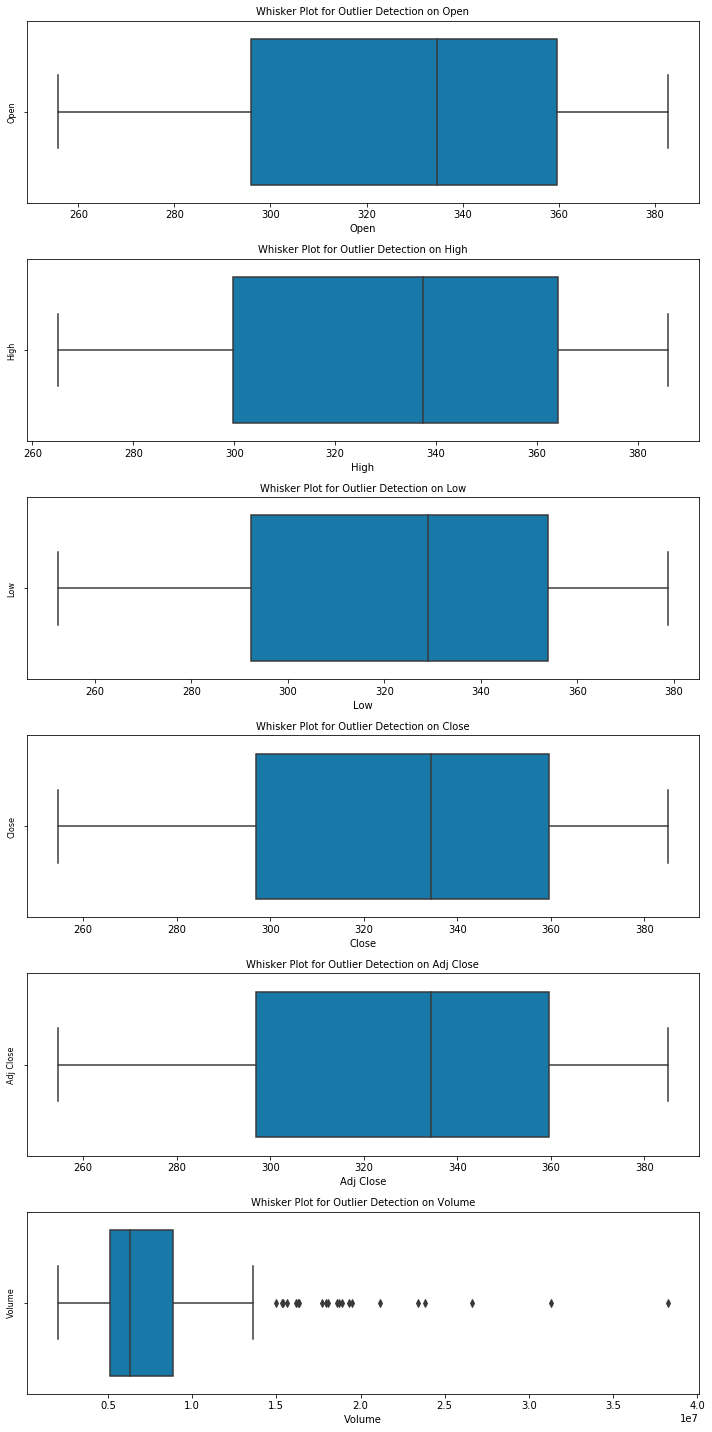

In [12]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(NFLX[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [14]:
NFLX.reset_index(inplace=True)

In [16]:
NFLX.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
1,2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2,2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
3,2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
4,2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


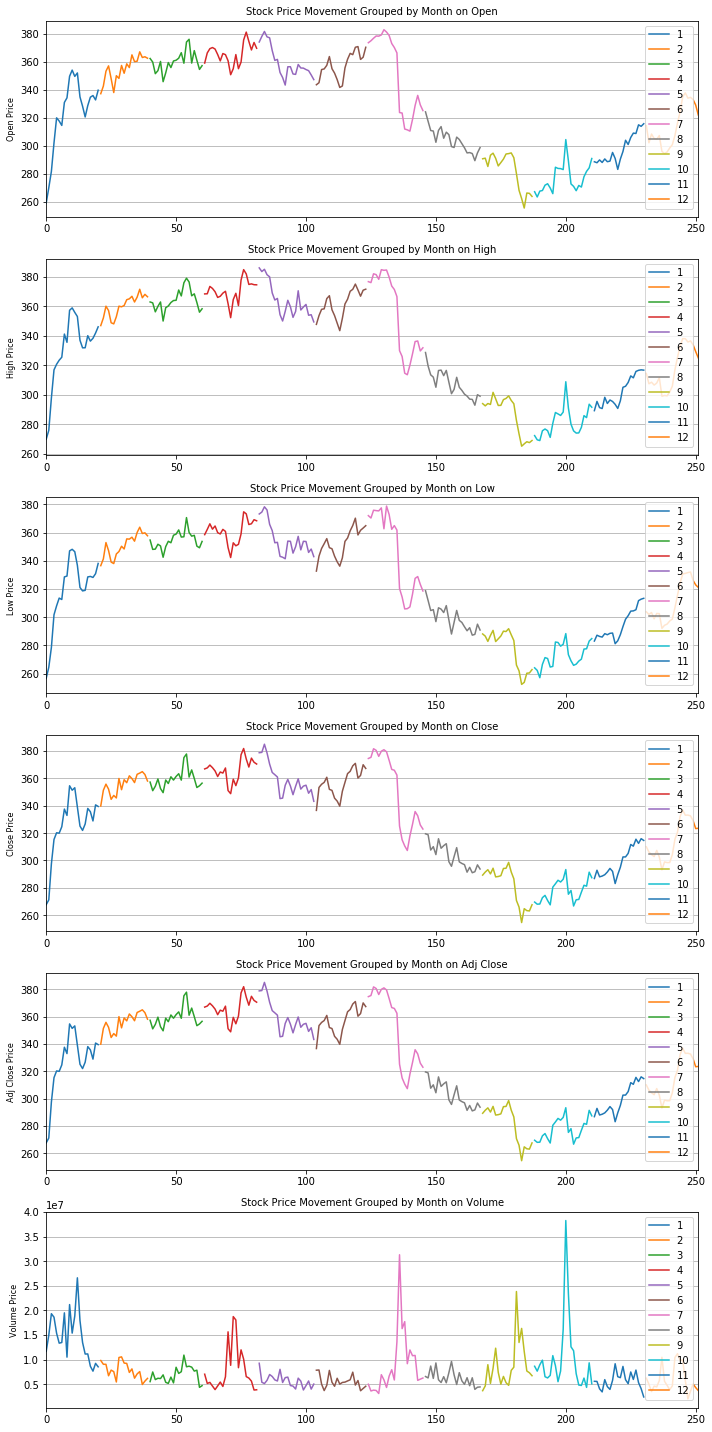

In [20]:
NFLX['Month'] = NFLX['Date'].dt.month
NFLX['WeekDay'] = NFLX['Date'].dt.weekday

# Firstly, plot the data Month-wise to see the duration of when it hiked and dipped
fig, ax = plt.subplots(len(Column_List), figsize = (10, 20))

# Group the data by Month and plot
for i, col_list in enumerate(Column_List):
    NFLX.groupby('Month')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Month on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8)
    fig.tight_layout(pad = 1.1)
    ax[i].yaxis.grid(True) # To enable grid only on the Y-axis

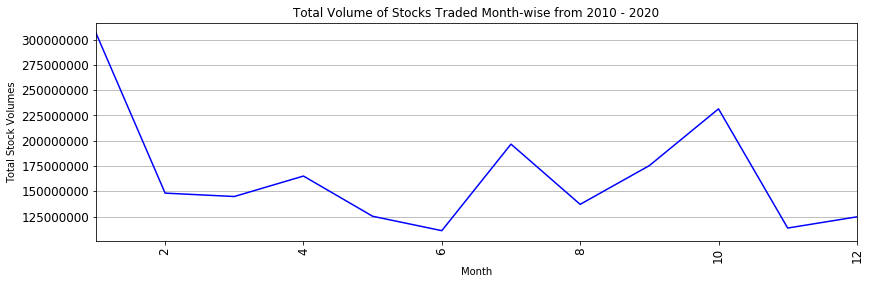

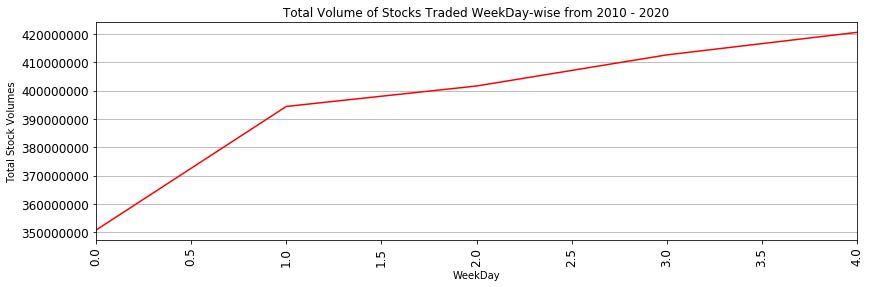

In [19]:
# Visualzing only the total volume of stocks traded grouped month-wise
check = NFLX.groupby('Month')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded Month-wise", rot = 90, color = "blue")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)

# Visualzing only the total volume of stocks traded grouped weekday-wise
check = NFLX.groupby('WeekDay')['Volume'].sum()
plt.figure(figsize = (30, 4))
ax1 = plt.subplot(121)
check.plot(y = "Volume", legend = False, fontsize = 12, sharex = False, title = "Total Volume of Stocks Traded WeekDay-wise", rot = 90, color = "red")
ax1.ticklabel_format(useOffset = False, style = 'plain')
ax1.set_ylabel("Total Stock Volumes")
ax1.yaxis.grid(True)